In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
dataset=pd.read_csv('I:\Datasets\Airline Passenger Time Series data.csv')
dataset.head(5)

,time,passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   time        144 non-null    object
 1   passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB



<font color=Blue> As can be seen from the data that data column here is not in date time format. So first we need to convert it into datetime format </font>

In [4]:
dataset['time']=pd.to_datetime(dataset['time'])
dataset.head(4)

,time,passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   time        144 non-null    datetime64[ns]
 1   passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


<font color=Blue> We will convert data column in MM-YYYY format </font>

In [6]:
from datetime import datetime
dataset['time'] = dataset['time'].dt.strftime('%Y-%m')

In [7]:
dataset.head(4)

,time,passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129


<font color=Blue> Setting the Index Column </font>

In [8]:
dataset.set_index('time',inplace=True)

In [9]:
dataset.head(4)

,passengers
time,
1949-01,112
1949-02,118
1949-03,132
1949-04,129


<AxesSubplot:xlabel='time'>

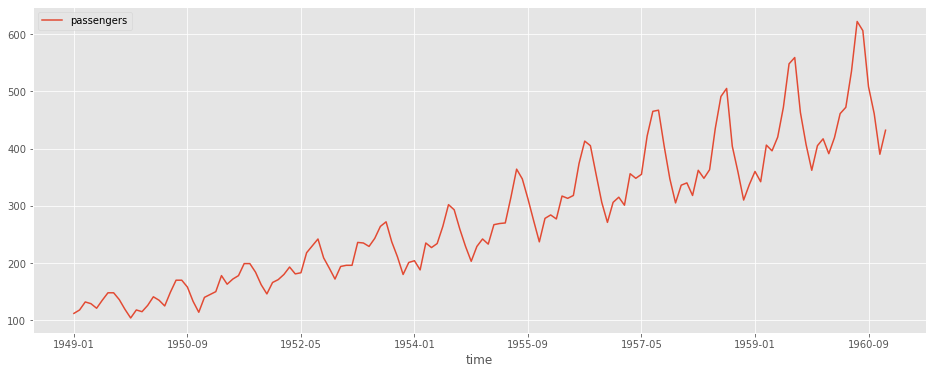

In [10]:
dataset.plot( figsize=(16,6))

# We will apply basic models without any data preprocessing and see the forecast

Choosing a model
Moving Average, Exponential smoothings methods are appropriate for non-stationary data (ie data with a trend and seasonal data).
ARIMA models should be used on stationary data only. 
One should therefore remove the trend of the data (via deflating or logging), and then look at the differenced series.


<font color=Red>  1. Moving Average Method  </font>

The moving average value can also be used directly to make predictions.
It is a naive model and assumes that the trend and seasonality components of the time series have already been removed or 
adjusted for.
The moving average model for predictions can easily be used in a walk-forward manner.
As new observations are made available (e.g. daily), the model can be updated and a prediction made for the next day.
We can implement this manually in Python. Below is an example of the moving average model used in a walk-forward manner

In [11]:
df_sma = dataset.copy()

Text(0, 0.5, 'Passengers')

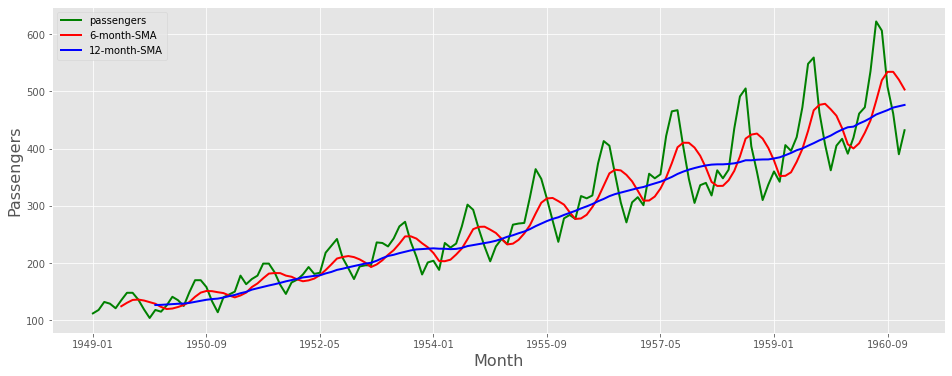

In [12]:
colors=['green','red','blue']
df_sma['6-month-SMA'] = dataset['passengers'].rolling(window=6).mean()
df_sma['12-month-SMA'] = dataset['passengers'].rolling(window=12).mean()
df_sma.plot(color=colors,linewidth=2,figsize=(16,6))
plt.xlabel('Month', fontsize=16)
plt.ylabel('Passengers', fontsize=16)

In [13]:
df_sma.tail(12)

,passengers,6-month-SMA,12-month-SMA
time,,,
1960-01,417,435.500000,433.083333
1960-02,391,407.500000,437.166667
1960-03,419,400.166667,438.250000
1960-04,461,409.166667,443.666667
1960-05,472,427.500000,448.000000
1960-06,535,449.166667,453.250000
1960-07,622,483.333333,459.416667
1960-08,606,519.166667,463.333333
1960-09,508,534.000000,467.083333


In [14]:
print((mean_squared_error(df_sma['passengers'][130:144],df_sma['6-month-SMA'][130:144]))/15)
print((mean_absolute_error(df_sma['passengers'][130:144],df_sma['6-month-SMA'][130:144]))/15)

390.0451058201059
4.384920634920635




<font color=Red>  2.Exponential Moving Average  </font>





<font color=Blue>  The exponential moving average is a widely used method to filter out noise and identify trends. The weight of each element decreases progressively over time, meaning the exponential moving average gives greater weight to recent data points. This is done under the idea that recent data is more relevant than old data. Compared to the simple moving average, the exponential moving average reacts faster to changes, since is more sensitive to recent movements.  </font>


In [15]:
dataset['EMA']=dataset['passengers'].ewm(span=3,min_periods=0,adjust=False,ignore_na=False).mean()

In [16]:
dataset

,passengers,EMA
time,,
1949-01,112,112.000000
1949-02,118,115.000000
1949-03,132,123.500000
1949-04,129,126.250000
1949-05,121,123.625000
...,...,...
1960-08,606,582.096411
1960-09,508,545.048205
1960-10,461,503.024103


<AxesSubplot:xlabel='time'>

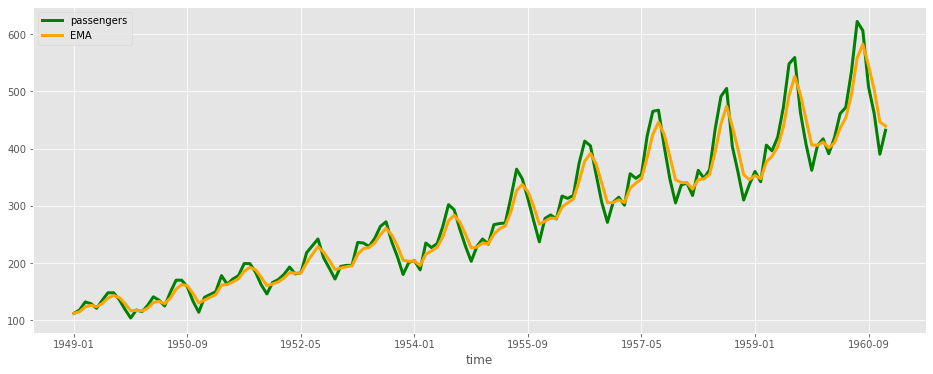

In [17]:
colors = ['green', 'orange']
dataset[['passengers','EMA']].plot(color=colors, linewidth=3, figsize=(16,6))

In [18]:
print((mean_squared_error(dataset['passengers'][130:144],dataset['EMA'][130:144]))/15)
print((mean_absolute_error(dataset['passengers'][130:144],dataset['EMA'][130:144]))/15)

75.43282380222445
1.8316167769218876


We can see clearly , EMA performing better than simple moving average




<font color=Red> Simple Exponential Smoothing  </font>








<font color=Blue> Simple Exponential Smoothing is used for time series prediction when the data particularly  does not follow any:

Trend: An upward or downward slope
Seasonality: Shows a particular pattern due to seasonal factors like Hours, days, Year, etc.
SES works on weighted averages i.e. the average of the previous level and current observation. Largest weights are associated with the recent observations and the smallest weights are associated with the oldest observations.

The decrease in weight is controlled by the smoothing parameter which is known as 𝜶(alpha) here. 𝜶(alpha) value can be between 0 to 1:

𝜶(alpha)=0: Means that forecast for future value is the average of historical data.
𝜶(alpha)=1: Means that forecast for all future value is the value of the last observation  </font>


In [19]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [20]:
span = 12
alpha = 2/(span + 1)

In [21]:
dataset['EWMA12'] = dataset['passengers'].ewm(alpha=alpha,adjust=False).mean()
dataset.head()

,passengers,EMA,EWMA12
time,,,
1949-01,112,112.000,112.000000
1949-02,118,115.000,112.923077
1949-03,132,123.500,115.857988
1949-04,129,126.250,117.879836
1949-05,121,123.625,118.359861


In [22]:
model = SimpleExpSmoothing(dataset['passengers'])
fitted_model = model.fit(smoothing_level = alpha,optimized = False)
dataset['SES12'] = fitted_model.fittedvalues.shift(1)
dataset.head()

C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


,passengers,EMA,EWMA12,SES12
time,,,,
1949-01,112,112.000,112.000000,NaN
1949-02,118,115.000,112.923077,112.000000
1949-03,132,123.500,115.857988,112.000000
1949-04,129,126.250,117.879836,112.923077
1949-05,121,123.625,118.359861,115.857988


In [23]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(dataset['passengers'], trend = 'add')
fitted_model = model.fit()
dataset['DES_add_12'] = fitted_model.fittedvalues.shift(-1)
dataset.head()

C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


,passengers,EMA,EWMA12,SES12,DES_add_12
time,,,,,
1949-01,112,112.000,112.000000,NaN,114.221156
1949-02,118,115.000,112.923077,112.000000,120.175837
1949-03,132,123.500,115.857988,112.000000,134.115056
1949-04,129,126.250,117.879836,112.923077,131.244976
1949-05,121,123.625,118.359861,115.857988,123.283465


<AxesSubplot:xlabel='time'>

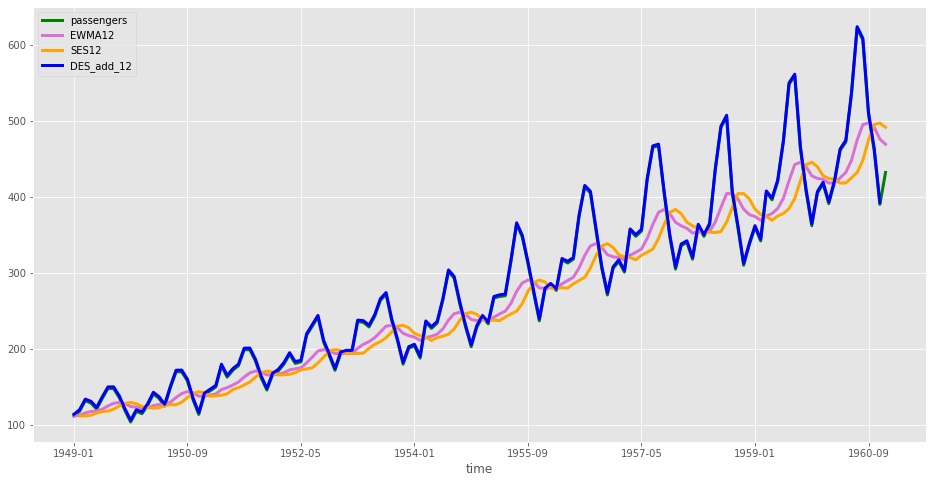

In [24]:
#dataset.plot(figsize = (12,5),figsize=(12,9))
colors = ['green', 'orchid', 'orange','blue']
dataset[['passengers','EWMA12','SES12','DES_add_12']].plot(color=colors, linewidth=3, figsize=(16,8))

# Advance Forecasting Methods






<font color=Red> AR Model </font>








<font color=Blue> In a multiple regression model, we forecast the variable of interest using a linear combination of predictors. 
In an autoregression model, we forecast the variable of interest using a linear combination of past values of the variable. 
The term autoregression indicates that it is a regression of the variable against itself.  </font>










<font color=Blue> Before applying these methods , we have to make sure that out data is staionary.

A stationary time series is one whose properties do not depend on the time at which the series is observed. Thus, time series with trends, or with seasonality, are not stationary — the trend and seasonality will affect the value of the time series at different times. On the other hand, a white noise series is stationary — it does not matter when you observe it, it should look much the same at any point in time.

Some cases can be confusing — a time series with cyclic behaviour (but with no trend or seasonality) is stationary. This is because the cycles are not of a fixed length, so before we observe the series we cannot be sure where the peaks and troughs of the cycles will be. </font>



<font color=Red>Check for stationarity of Time Series  </font>

# Data Preprocessing

1. Looking at the data plot

In [25]:
dataset['Datetime']=dataset.index

In [26]:
dataset['Datetime']=pd.to_datetime(dataset['Datetime'])

In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 1949-01 to 1960-12
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   passengers  144 non-null    int64         
 1   EMA         144 non-null    float64       
 2   EWMA12      144 non-null    float64       
 3   SES12       143 non-null    float64       
 4   DES_add_12  143 non-null    float64       
 5   Datetime    144 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 7.9+ KB


In [28]:
dataset.head(4)

,passengers,EMA,EWMA12,SES12,DES_add_12,Datetime
time,,,,,,
1949-01,112,112.00,112.000000,NaN,114.221156,1949-01-01
1949-02,118,115.00,112.923077,112.000000,120.175837,1949-02-01
1949-03,132,123.50,115.857988,112.000000,134.115056,1949-03-01
1949-04,129,126.25,117.879836,112.923077,131.244976,1949-04-01


In [29]:
dataset.reset_index(drop=True,inplace=True)

In [30]:
dataset['Month']=dataset['Datetime'].dt.month
dataset['Year']=dataset['Datetime'].dt.year
dataset.head(4)

,passengers,EMA,EWMA12,SES12,DES_add_12,Datetime,Month,Year
0,112,112.00,112.000000,NaN,114.221156,1949-01-01,1,1949
1,118,115.00,112.923077,112.000000,120.175837,1949-02-01,2,1949
2,132,123.50,115.857988,112.000000,134.115056,1949-03-01,3,1949
3,129,126.25,117.879836,112.923077,131.244976,1949-04-01,4,1949


Text(0.5, 1.0, 'Yearly Plot')

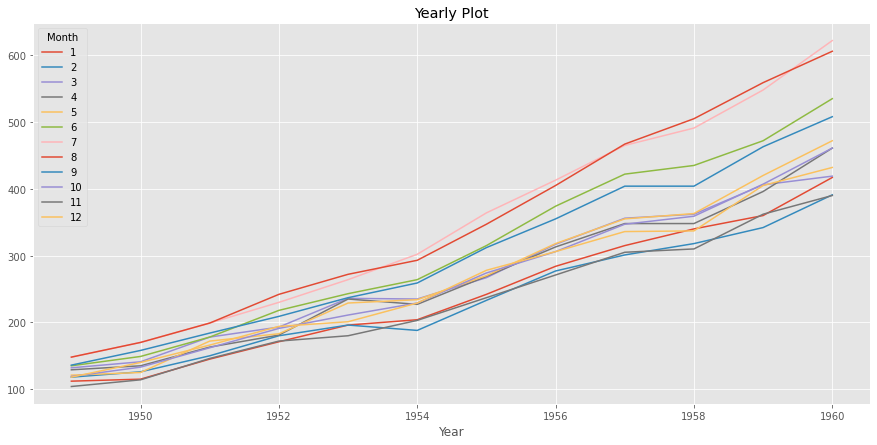

In [31]:
fig, ax = plt.subplots(figsize=(15,7))
dataset.groupby(['Year','Month']).sum()['passengers'].unstack().plot(ax=ax)
plt.title("Yearly Plot")

Text(0.5, 1.0, 'Monthly Plot')

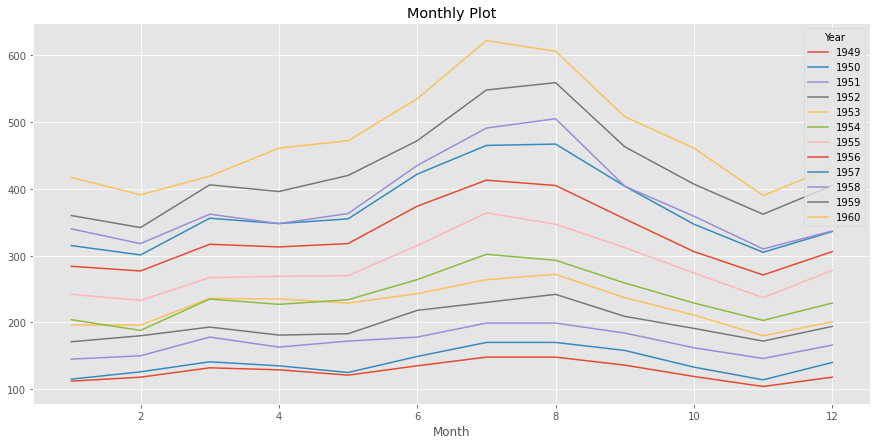

In [32]:
fig, ax = plt.subplots(figsize=(15,7))
dataset.groupby(['Month','Year']).sum()['passengers'].unstack().plot(ax=ax)
plt.title("Monthly Plot")

In [33]:
import statsmodels.api as sm
cycle, trend = sm.tsa.filters.hpfilter(dataset['passengers'], 129600)
decomp = dataset[['passengers']]
decomp["cycle"] = cycle
decomp["trend"] = trend

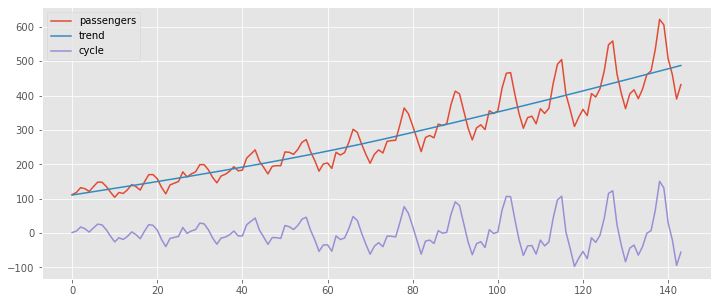

In [34]:
fig, ax = plt.subplots()
decomp[["passengers", "trend", "cycle"]].plot(ax=ax, figsize=(12, 5))
plt.show()

In [35]:
dataset=pd.read_csv('I:\Datasets\Airline Passenger Time Series data.csv')
dataset['time']=pd.to_datetime(dataset['time'])
dataset.set_index('time',inplace=True)





<font color=Blue> 
Time Series Decomposition with Error Trend Seasonality Model

Trend Component shows the general growth/decline pattern.
Seasonal Component shows any repetitive cycles in the time series.
Residual Component is the error or noise that cannot be represented as Trend or Seaonality.
Additive Model is used when the trend is more linear and the Trend and 
Seasonality Components are increasing/decreasing at a constant rate over time. 
Multiplicative Model is used when the Trend and 
Seasonality Components are increasing/decreasing at a non-linear rate over time. </font>




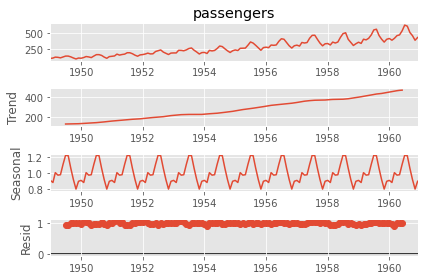

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
results = seasonal_decompose(dataset['passengers'], model='multiplicative')
results.plot();

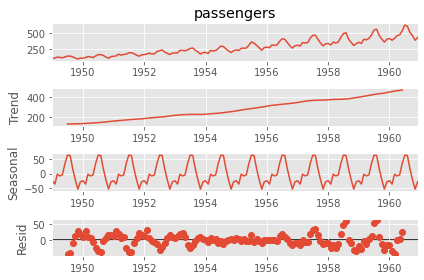

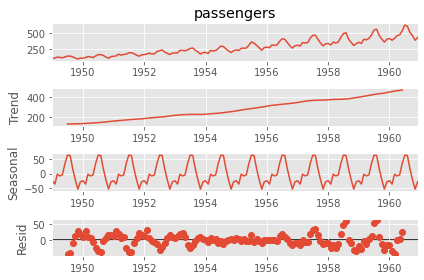

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose
results = seasonal_decompose(dataset['passengers'], model='additive')
results.plot()

<font color=Blue>. Summary Statistics Method </font>

In [38]:
dataset = pd.read_csv('I:\Datasets\Airline Passenger Time Series data.csv')
X = dataset['passengers']
#X = log(X)
split = round(len(X)/3)
X1, X2,X3 = X[0:split], X[split:(2*split)],X[(2*split):]
mean1, mean2,mean3 = X1.mean(), X2.mean(),X3.mean()
var1, var2,var3 = X1.var(), X2.var(),X3.var()
print('mean1=%f, mean2=%f, mean3=%f' % (mean1, mean2,mean3))
print('variance1=%f, variance2=%f, variance3=%f' % (var1, var2,var3))

mean1=158.375000, mean2=269.041667, mean3=413.479167
variance1=1094.664894, variance2=3105.998227, variance3=6161.999557


 <font color=Blue> 3. What is Unit Root Test .  What is The Dickey-Fuller Test </font>

 <font color=Blue>The ADF test belongs to a category of tests called ‘Unit Root Test’, 
which is the proper method for testing the stationarity of a time series.

Unit root is a characteristic of a time series that makes it non-stationary. 
Technically speaking, a unit root is said to exist in a time series of the value of Alpha = 1 in the below equation.
Y(t)=Alpha*Y(t-1)+error. So, if Alpha=1, series is not stationary.

What does this mean to us?

The presence of a unit root means the time series is non-stationary. </font>





 <font color=Blue>A Dickey-Fuller test is a unit root test that tests the null hypothesis that α=1 in the following model equation 

That means, there is a hypothesis testing involved with a null and alternate hypothesis and as a result ,
a test statistic is computed and p-values get reported.
It is from the test statistic and the p-value, you can make an inference as to whether a given series is stationary or not.

Null Hypothesis (H0): alpha=1
Alternate Hypothesis (H1): alpha<1 </font>

 <font color=Blue> The Augmented Dickey-Fuller test expands the Dickey-Fuller test equation to include high order regressive process in the model </font>


 <font color=Blue> 

H0: p-value > 0.05: If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. 
    It has some time dependent structure.
    
H1: p-value <= 0.05: The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. </font>

In [39]:
from statsmodels.tsa.stattools import adfuller
series = pd.read_csv('I:\Datasets\Airline Passenger Time Series data.csv', header=0, index_col=0, squeeze=True)
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


We will also use ACF plot to check Stationarity of data

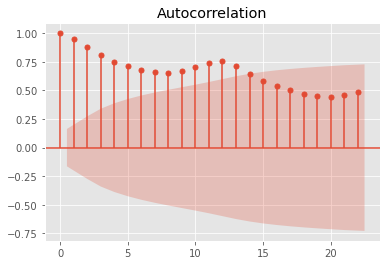

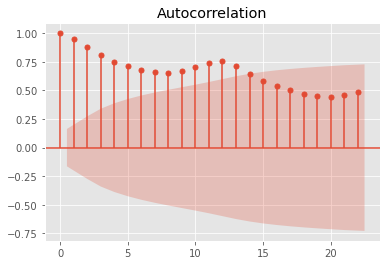

In [40]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(dataset['passengers'])

# Now we have to make series stationary

So, we can try 2 different methods here and check again whether series becomes staionary or not
1. Simple differencing : Y(t)-Y(t-1)
2. Seasonal differencing: Y(t)-Y(t-12)

In [41]:
dataset=pd.read_csv('I:\Datasets\Airline Passenger Time Series data.csv')

In [42]:
dataset['time']=pd.to_datetime(dataset['time'])

In [43]:
dataset.set_index('time',inplace=True)

In [44]:
dataset

,passengers
time,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [45]:
dataset_diff=dataset.diff(periods=1)

In [46]:
dataset_diff.head(4)

,passengers
time,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0


In [47]:
dataset_diff=dataset_diff[1:]

In [48]:
dataset_diff.head(4)

,passengers
time,
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0


<font color=Red> So, again we will check stationarity for this series.   </font>

In [49]:
dataset_diff['NewDate']=dataset_diff.index
dataset_diff['Month']=dataset_diff['NewDate'].dt.month
dataset_diff['Year']=dataset_diff['NewDate'].dt.year
dataset_diff.head(4)

,passengers,NewDate,Month,Year
time,,,,
1949-02-01,6.0,1949-02-01,2,1949
1949-03-01,14.0,1949-03-01,3,1949
1949-04-01,-3.0,1949-04-01,4,1949
1949-05-01,-8.0,1949-05-01,5,1949


<AxesSubplot:xlabel='Year'>

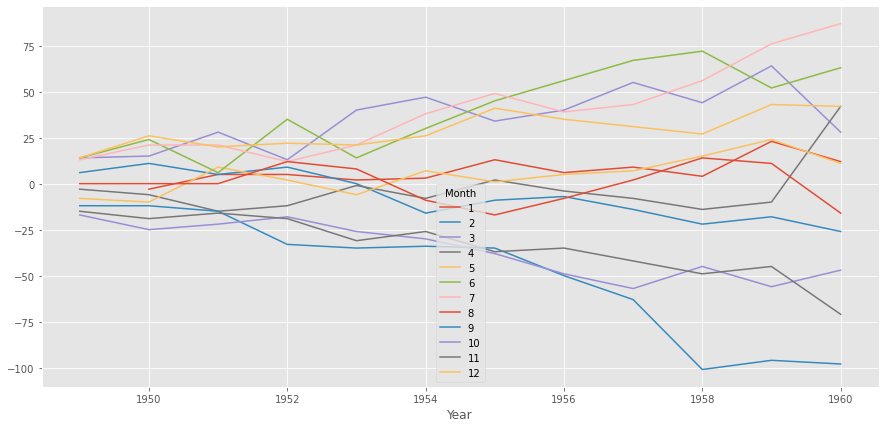

In [50]:
fig, ax = plt.subplots(figsize=(15,7))
dataset_diff.groupby(['Year','Month']).sum()['passengers'].unstack().plot(ax=ax)

<AxesSubplot:xlabel='Month'>

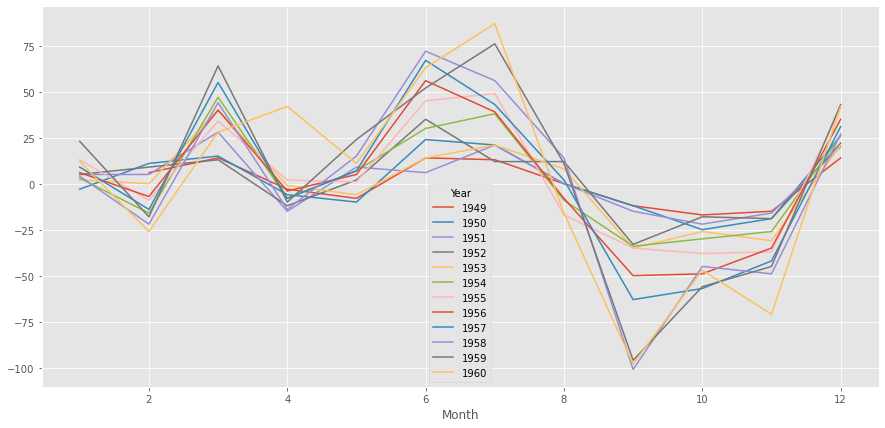

In [51]:
fig, ax = plt.subplots(figsize=(15,7))
dataset_diff.groupby(['Month','Year']).sum()['passengers'].unstack().plot(ax=ax)

In [52]:
X = dataset_diff['passengers']
#X = log(X)
split = round(len(X)/3)
X1, X2,X3 = X[0:split], X[split:(2*split)],X[(2*split):]
mean1, mean2,mean3 = X1.mean(), X2.mean(),X3.mean()
var1, var2,var3 = X1.var(), X2.var(),X3.var()
print('mean1=%f, mean2=%f, mean3=%f' % (mean1, mean2,mean3))
print('variance1=%f, variance2=%f, variance3=%f' % (var1, var2,var3))

mean1=1.750000, mean2=2.479167, mean3=2.489362
variance1=252.574468, variance2=840.212323, variance3=2400.211841


In [53]:
X = dataset_diff['passengers']
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.829267
p-value: 0.054213
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


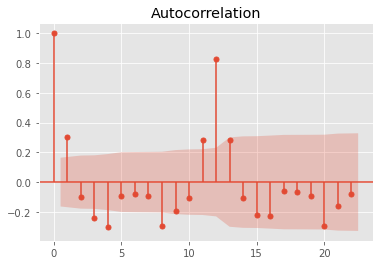

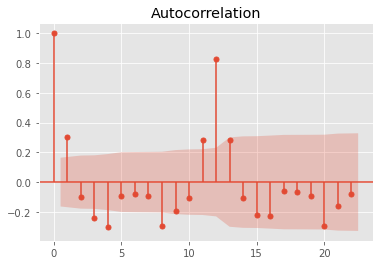

In [54]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(X)

So, we can infer that this data is close to stationary

In [55]:
dataset=pd.read_csv('I:\Datasets\Airline Passenger Time Series data.csv')
dataset['time']=pd.to_datetime(dataset['time'])
dataset.set_index('time',inplace=True)
dataset_diff=dataset.diff(periods=12)
dataset_diff=dataset_diff[12:]

In [56]:
dataset_diff['NewDate']=dataset_diff.index
dataset_diff['Month']=dataset_diff['NewDate'].dt.month
dataset_diff['Year']=dataset_diff['NewDate'].dt.year
dataset_diff.head(4)

,passengers,NewDate,Month,Year
time,,,,
1950-01-01,3.0,1950-01-01,1,1950
1950-02-01,8.0,1950-02-01,2,1950
1950-03-01,9.0,1950-03-01,3,1950
1950-04-01,6.0,1950-04-01,4,1950


<AxesSubplot:xlabel='Year'>

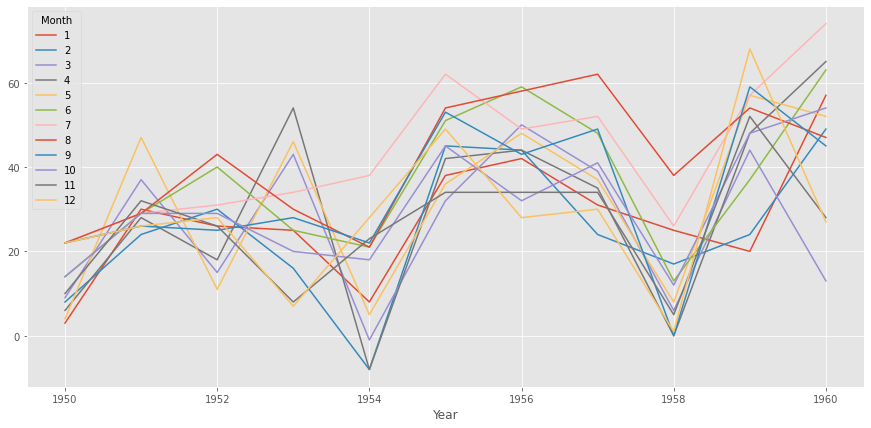

In [57]:
fig, ax = plt.subplots(figsize=(15,7))
dataset_diff.groupby(['Year','Month']).sum()['passengers'].unstack().plot(ax=ax)

<AxesSubplot:xlabel='Month'>

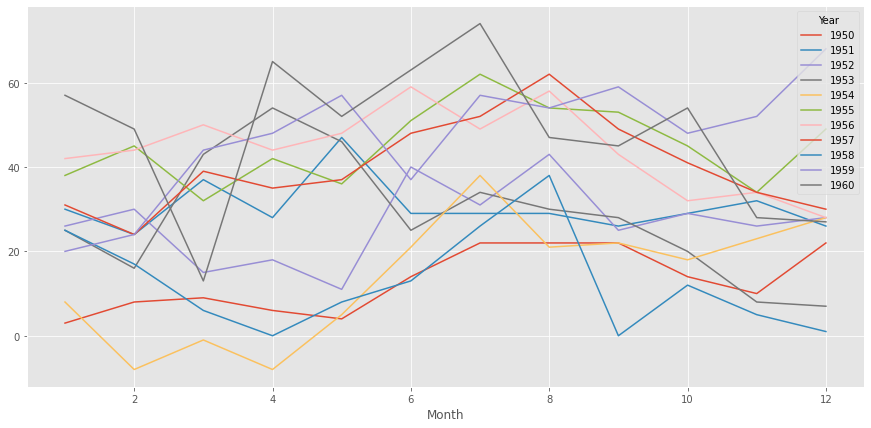

In [58]:
fig, ax = plt.subplots(figsize=(15,7))
dataset_diff.groupby(['Month','Year']).sum()['passengers'].unstack().plot(ax=ax)

In [59]:
X = dataset_diff['passengers']
#X = log(X)
split = round(len(X)/3)
X1, X2,X3 = X[0:split], X[split:(2*split)],X[(2*split):]
mean1, mean2,mean3 = X1.mean(), X2.mean(),X3.mean()
var1, var2,var3 = X1.var(), X2.var(),X3.var()
print('mean1=%f, mean2=%f, mean3=%f' % (mean1, mean2,mean3))
print('variance1=%f, variance2=%f, variance3=%f' % (var1, var2,var3))


mean1=25.386364, mean2=32.522727, mean3=37.409091
variance1=136.754228, variance2=314.162262, variance3=423.828753


In [60]:
X = dataset_diff['passengers']
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.383021
p-value: 0.011551
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


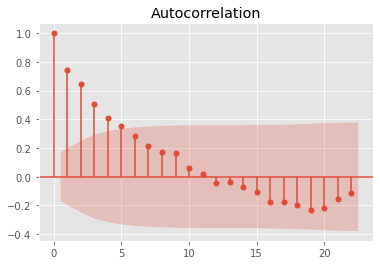

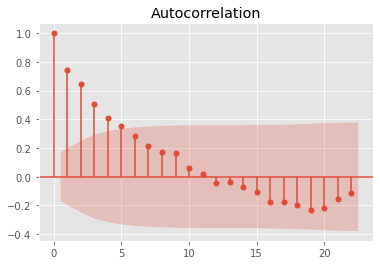

In [61]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(X)

First we will divide our data into training and testing data , so that we will train our model on 
training data and test it on test data.

In [62]:
X=dataset_diff['passengers'].values
train=X[0:100]
test=X[100:132]

In [63]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error


In [64]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [65]:
for i in range(1,50):
    model_ar=AR(train)
    model_ar_fit=model_ar.fit(maxlag = i)
    predictions=model_ar_fit.predict(start=100,end=131)
    print("Error for lag",+i)
    print(mean_squared_error(test,predictions))
    print("\n")

Error for lag 1
492.5764289721409


Error for lag 2
511.6621734593181


Error for lag 3
488.2335467434609


Error for lag 4
479.2746966064439


Error for lag 5
470.04363437542787


Error for lag 6
464.9342929823695


Error for lag 7
459.36587168715664


Error for lag 8
468.7376160610182


Error for lag 9
479.5285370176709


Error for lag 10
435.24265015885874


Error for lag 11
445.2747758825993


Error for lag 12
452.8430889912023


Error for lag 13
505.7910898289266


Error for lag 14
466.49668914156473


Error for lag 15
491.87003876310155


Error for lag 16
495.9727250111467


Error for lag 17
519.4264965083521


Error for lag 18
483.91758872794287


Error for lag 19
511.3910027297964


Error for lag 20
511.8279491406337


Error for lag 21
474.85302379991185


Error for lag 22
474.57186427997283


Error for lag 23
553.520964798314


Error for lag 24
457.12511163844727


Error for lag 25
452.4990588872321


Error for lag 26
480.2382031848697


Error for lag 27
514.8303978715721


Er

238.43731889443978


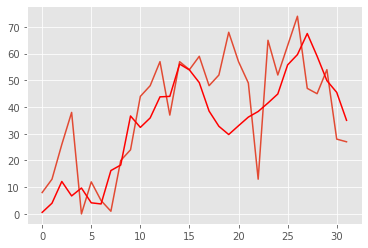

In [66]:
model_ar=AR(train)
model_ar_fit=model_ar.fit(maxlag = 43)
predictions=model_ar_fit.predict(start=100,end=131)
plt.plot(test)
plt.plot(predictions, color='red')
print(mean_squared_error(test,predictions))

In [67]:
print(test)
print(predictions)

[ 8. 13. 26. 38.  0. 12.  5.  1. 20. 24. 44. 48. 57. 37. 57. 54. 59. 48.
 52. 68. 57. 49. 13. 65. 52. 63. 74. 47. 45. 54. 28. 27.]
[ 0.57784437  4.00655566 12.14649893  6.73667781  9.69135133  4.15588534
  3.72603274 16.23474229 18.30017101 36.66438002 32.3867299  35.93344177
 43.82287901 44.00352632 56.10442226 53.89086509 49.16164965 38.50274757
 32.79734322 29.71917419 33.0157313  36.2460393  38.34434141 41.52594685
 44.90161265 55.78453671 59.64221364 67.52677851 59.07027687 49.88924207
 45.50195044 35.04527556]


In [68]:
dataset_diff

,passengers,NewDate,Month,Year
time,,,,
1950-01-01,3.0,1950-01-01,1,1950
1950-02-01,8.0,1950-02-01,2,1950
1950-03-01,9.0,1950-03-01,3,1950
1950-04-01,6.0,1950-04-01,4,1950
1950-05-01,4.0,1950-05-01,5,1950
...,...,...,...,...
1960-08-01,47.0,1960-08-01,8,1960
1960-09-01,45.0,1960-09-01,9,1960
1960-10-01,54.0,1960-10-01,10,1960


In [69]:
mean_squared_error(test,predictions)

238.43731889443978

MA (Moving Average)
Rather than using past values of the forecast variable in a regression, a moving average model uses past forecast errors 
in a regression-like model.

However, moving average models should not be confused with the simple moving average smoothing .



ARMA ( an ARMA(p,q) is simply the combination of both AR and MA models into a single equation:)

In [70]:
from statsmodels.tsa.arima_model import ARMA

557.7858230847667


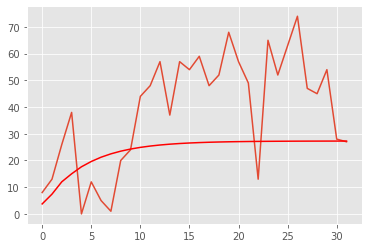

In [71]:
model_ar=ARMA(train,order=(2,2))#p=1, q=1
model_ar_fit=model_ar.fit()
predictions=model_ar_fit.predict(start=100,end=131)
plt.plot(test)
plt.plot(predictions, color='red')
print(mean_squared_error(test,predictions))

In [72]:
#now we will try Arima model
#P,d ,q  
#p=periods taken for autoregressive model
#d = Integrated Order, difference
#q=Periods in  moving average
from statsmodels.tsa.arima_model import ARIMA

1560.352095595265


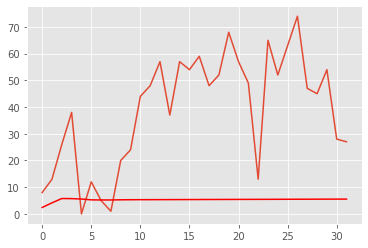

In [73]:
model_arima=ARIMA(train,order=(3,1,1))
model_arima_fit=model_arima.fit()
predictions=model_arima_fit.forecast(steps=32)[0]
plt.plot(test)
plt.plot(predictions, color='red')
print(mean_squared_error(test,predictions))

In [74]:
r2_score(test,predictions)

-2.5531392855242676

In [75]:
import itertools
p=d=q=range(0,4)
pdq=list(itertools.product(p,d,q))

In [76]:
for params in pdq:
    try:
        
        model_arima=ARIMA(train,order=params)
        model_arima_fit=model_arima.fit()
        predictions=model_arima_fit.forecast(steps=33)[0]
        print(params,mean_squared_error(test,predictions))
    except:
        continue

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Anaconda\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


303.35928430878164


C:\Anaconda\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


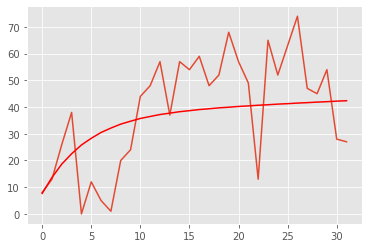

In [77]:
model_arima=ARIMA(train,order=(2,1,2))
model_arima_fit=model_arima.fit()
predictions=model_arima_fit.forecast(steps=32)[0]
plt.plot(test)
plt.plot(predictions, color='red')
print(mean_squared_error(test,predictions))

Usually, in the basic ARIMA model, we need to provide the p,d, and q values which are essential. 
We use statistical techniques to generate these values by performing the difference to eliminate 
the non-stationarity and plotting ACF and PACF graphs. In Auto ARIMA, the model itself will 
generate the optimal p, d, and q values which would be suitable for the data set to provide better forecasting.

In the Auto ARIMA model, note that small p,d,q values represent non-seasonal components, 
and capital P, D, Q represent seasonal components.
It works similarly like hyper tuning techniques to find the optimal value of p, d, and q with different combinations 
and the final values would be determined with the lower AIC, BIC parameters taking into consideration.
Here, we are trying with the p, d, q values ranging from 0 to 5 to get better optimal values from the model. 
There are many other parameters in this model and to know more about the functionality, visit this link

In [78]:
from pmdarima.arima import auto_arima

In [79]:
arima_model=auto_arima(train,start_p= 0,d=1,start_q=0,max_p=5,max_d=5,start_P=0, 
                       D=1,start_Q=0,max_P=5,max_D=5,max_Q=5, m=12,seasonal=True)

In [80]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  100
Model:             SARIMAX(1, 1, 0)x(5, 1, 0, 12)   Log Likelihood                -325.573
Date:                            Sat, 14 Aug 2021   AIC                            665.146
Time:                                    10:41:51   BIC                            682.408
Sample:                                         0   HQIC                           672.097
                                            - 100                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2805      0.108     -2.595      0.009      -0.492      -0.069
ar.S.L12      -1.2067      0.120    -10.023      0.000      -1.443      -0.971
ar.S.L24      -1.1685      0.201     -5.807      0.000      -1.563      -0.774
ar.S.L36      -0.9954      0.231     -4.300      0.000      -1.449      -0.542
ar.S.L48      -0.7131      0.274     -2.601      0.009      -1.250      -0.176
ar.S.L60      -0.4070      0.225     -1.812      0.070      -0.847       0.033
sigma2        74.3573     18.982      3.917      0.000      37.153     111.562
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.18
Prob(Q):                              0.95   Prob(JB):                         0.34
Heteroskedasticity (H):               0.59   Skew:                             0.37
Prob(H) (two-sided):                  0.16   Kurtosis:                         2.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [81]:
predictions=arima_model.predict(n_periods=32)

In [82]:
predictions

array([ 0.14269475,  9.91623545, 14.74617797, 10.42909294,  4.7345124 ,
        2.62773309, -1.23456459,  3.87958509,  5.7241818 ,  0.87310901,
       14.21797084, 19.42407605, 19.1928683 , 20.08324151, 29.47818729,
       23.21993769, 20.51379526, 12.00070086,  6.41938123,  9.52958002,
       10.96856469,  6.64996463,  6.63292536,  3.15360369,  8.13649451,
       24.43845499, 30.83549875, 26.86962297, 20.82665437, 13.93832146,
       12.96508475, 16.75694678])

975.9127829895212


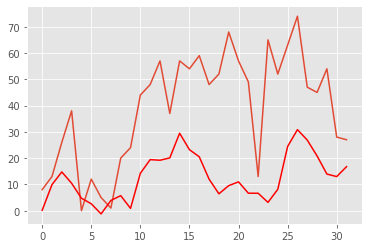

In [83]:
plt.plot(test)
plt.plot(predictions, color='red')
print(mean_squared_error(test,predictions))

465.0230153476099


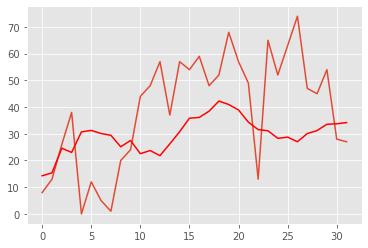

In [84]:
model_arima=ARIMA(train,order=(20,1,2))
model_arima_fit=model_arima.fit()
predictions=model_arima_fit.forecast(steps=32)[0]
plt.plot(test)
plt.plot(predictions, color='red')
print(mean_squared_error(test,predictions))

303.35928430878164


C:\Anaconda\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


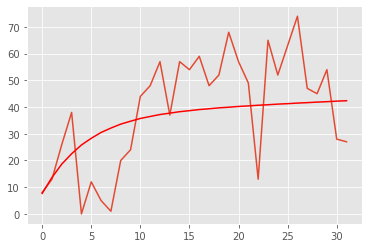

In [85]:
model_arima=ARIMA(train,order=(2,1,2))
model_arima_fit=model_arima.fit()
predictions=model_arima_fit.forecast(steps=32)[0]
plt.plot(test)
plt.plot(predictions, color='red')
print(mean_squared_error(test,predictions))

# Out of all, the best model output we are getting is from AR model with lag 43

263.8317345464205


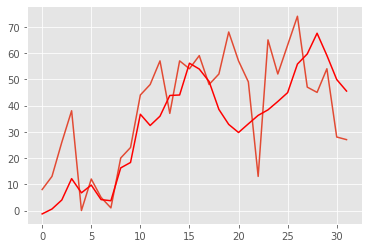

In [86]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar=AR(train)
model_ar_fit=model_ar.fit(maxlag = 43)
predictions=model_ar_fit.predict(start=99,end=130)
plt.plot(test)
plt.plot(predictions, color='red')
print(mean_squared_error(test,predictions))

In [87]:
predictions

array([-1.2943957 ,  0.57784437,  4.00655566, 12.14649893,  6.73667781,
        9.69135133,  4.15588534,  3.72603274, 16.23474229, 18.30017101,
       36.66438002, 32.3867299 , 35.93344177, 43.82287901, 44.00352632,
       56.10442226, 53.89086509, 49.16164965, 38.50274757, 32.79734322,
       29.71917419, 33.0157313 , 36.2460393 , 38.34434141, 41.52594685,
       44.90161265, 55.78453671, 59.64221364, 67.52677851, 59.07027687,
       49.88924207, 45.50195044])

SARIMA

In [88]:
#dataset=pd.read_csv('I:\Datasets\Airline Passenger Time Series data.csv')
#dataset['time']=pd.to_datetime(dataset['time'])
#dataset.set_index('time',inplace=True)
#dataset.index = pd.DatetimeIndex(dataset.index.values,freq=dataset.index.inferred_freq)
#dataset_diff=dataset.diff(periods=12)
#dataset_diff=dataset_diff[12:]

#p = range(0, 3)
#d = range(1,2)
#q = range(0, 3)
#pdq = list(itertools.product(p, d, q))
#seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
#print('Examples of parameter combinations for Seasonal ARIMA...')
#print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
#print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
#print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
#print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))
#for param in pdq:
#    for param_seasonal in seasonal_pdq:
#        try:
#            mod = sm.tsa.statespace.SARIMAX(dataset['passengers'],order=param,seasonal_order=param_seasonal,enforce_stationarity=False,
#                                            enforce_invertibility=False)
#            results = mod.fit()
#            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
#        except:
#            continue

In [89]:
from scipy.stats import norm
import itertools

from statsmodels.tsa.statespace.sarimax import SARIMAX
p=d=q=range(0,2)
pdq=list(itertools.product(p,d,q))


In [90]:
dataset=pd.read_csv('I:\Datasets\Airline Passenger Time Series data.csv')
dataset['time']=pd.to_datetime(dataset['time'])
dataset.set_index('time',inplace=True)
dataset.index = pd.DatetimeIndex(dataset.index.values,freq=dataset.index.inferred_freq)

In [91]:
len(dataset)

144

In [92]:
train_date = dataset.iloc[:109] # df.loc[:'1940-01-01']
test_data = dataset.iloc[109:]


In [93]:
len(test_data)

35

In [94]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35 entries, 1958-02-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   passengers  35 non-null     int64
dtypes: int64(1)
memory usage: 560.0 bytes


In [95]:
#predictions=resds.predict(test_data['passengers'])

In [96]:
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [97]:
print('Examples of parameter for SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter for SARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [98]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_date,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1499.42486720527
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1250.7663787205242
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:951.7436428663002
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:803.4500241790657
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:775.1681225151963
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:745.4574403639351
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:759.3654168016363
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:703.3507469332764
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1346.9861146121539
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1115.2956291613596
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:858.1193359879726
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:738.0279943188641
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:742.2915192564213
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:705.4859676254677
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:727.2602854311822
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:667.257276376724
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1001.5008448759443
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:829.0438577202631
ARIMA(0,

In [99]:
#mods = sm.tsa.statespace.SARIMAX(train_date['passengers'], order=(2,1,0), seasonal_order=(1,1,0,12), simple_differencing=True)
Sarima_model = SARIMAX(train_date,order=(43,0,0), seasonal_order=(0,1,0,12),enforce_stationarity=False,enforce_invertibility=False)
resds = Sarima_model.fit(disp=False)

3720.5249727377673


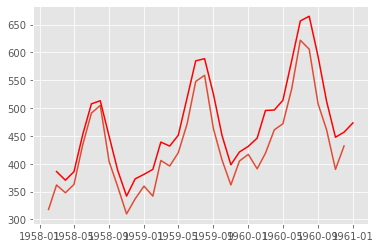

In [100]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
predictions=resds.predict(start=110,end=144)
#predictions=resds.forecast()[0]
 #ts_p = predictions.predicted_mean
plt.plot(test_data)
plt.plot(predictions, color='red')
print(mean_squared_error(test_data,predictions))

In [101]:
predictions

1958-03-01    386.089977
1958-04-01    370.570148
1958-05-01    385.874222
1958-06-01    453.349992
1958-07-01    507.697942
1958-08-01    513.297735
1958-09-01    449.301333
1958-10-01    388.322578
1958-11-01    341.949156
1958-12-01    372.943846
1959-01-01    381.083263
1959-02-01    389.965188
1959-03-01    439.018148
1959-04-01    431.894804
1959-05-01    451.356486
1959-06-01    518.765466
1959-07-01    584.963044
1959-08-01    588.852900
1959-09-01    524.990475
1959-10-01    450.997168
1959-11-01    398.267305
1959-12-01    421.238666
1960-01-01    431.336314
1960-02-01    446.157215
1960-03-01    495.765421
1960-04-01    496.648329
1960-05-01    514.142469
1960-06-01    585.626016
1960-07-01    656.619899
1960-08-01    665.087111
1960-09-01    593.164917
1960-10-01    512.104737
1960-11-01    447.768913
1960-12-01    456.789503
1961-01-01    473.471566
Freq: MS, Name: predicted_mean, dtype: float64